# Exploratory Data Analysis

## We will be playing around with Retail sales Dataset and explore the following questions
- How does customer age and gender influence their purchasing behavior?
- Which product categories hold the highest appeal among customers?
- What are the relationships between age and spending
- What insights can be gleaned from the distribution of product prices within each category?

In [7]:
!pip install pandas

In [8]:
!pip install pandas

In [9]:
!pip install matplotlib

##### Importing the required libraries in EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

##### Loading Dara into Data Frame

In [11]:
df = pd.read_csv('retail_sales_dataset.csv')
# Look into the inside of the file
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


##### Checking types of data

In [12]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

##### Dropping Irrelevant Column

In [13]:
# In this case, there are none

##### Renaming the columns

In [14]:
# No need to rename - Everything good :)

##### Dropping duplicate rows

In [15]:
df.drop_duplicates(subset=['Customer ID'])

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


##### Dropping the missing or null values

In [16]:
# Removing Rows with missing values in any column
df_cleaned = df.dropna(how = 'any')
df_cleaned

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


##### Detecting Outliers

In [17]:
# To understand what visualization works best.i used the following
# Reference : https://towardsdatascience.com/how-to-detect-handle-and-visualize-outliers-ad0b74af4af7/
#Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of Age, Quantity, Price per Unit and Total Amount


###### Sales Pattern

In [27]:
# Split the date column into date time year seperately
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
print(df)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  day  month  year  
0           3          

###### Age & Spending  Relationship

<Axes: xlabel='Age', ylabel='Total Amount'>

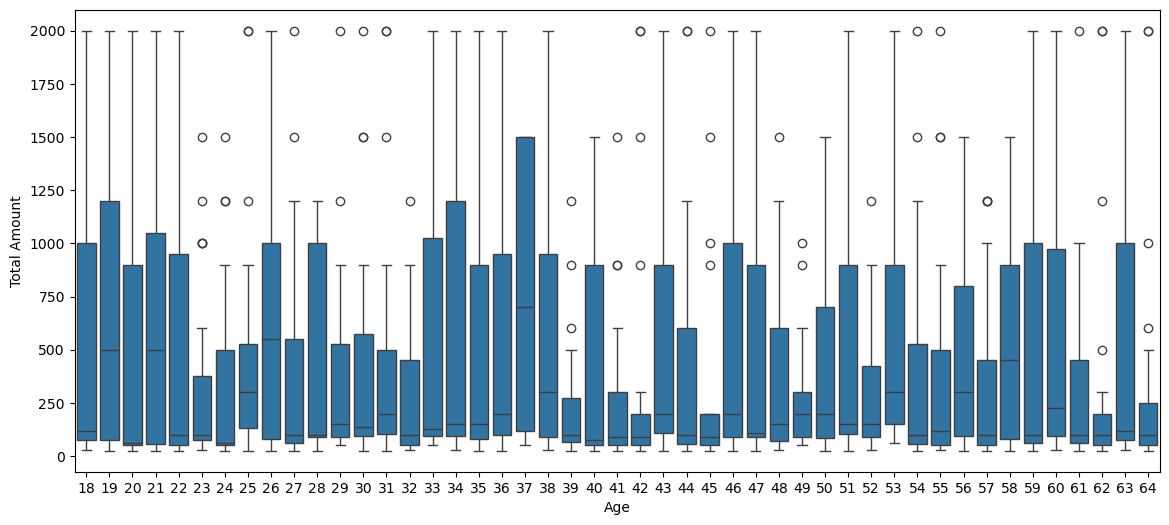

In [19]:
plt.figure(figsize=(14, 6))
sns.boxplot(x = df_cleaned['Age'], y= df_cleaned['Total Amount'])

###### Age & Gender vs Purchasing Behavior

In [20]:
# Create Age bins to make visualization easier
bins = [0, 20, 30, 40, 50, 60, 70] # Specifies where cut occurs (moving to age bin)
age_groups = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_cleaned['age_range'] = pd.cut(df_cleaned['Age'], bins)
df_cleaned['age_range']

0      (30, 40]
1      (20, 30]
2      (40, 50]
3      (30, 40]
4      (20, 30]
         ...   
995    (60, 70]
996    (50, 60]
997    (20, 30]
998    (30, 40]
999    (40, 50]
Name: age_range, Length: 1000, dtype: category
Categories (6, interval[int64, right]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

C:\Users\aryan\AppData\Local\Temp\ipykernel_37084\1195792471.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby(['age_range','Gender','Quantity']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='age_range,Gender'>

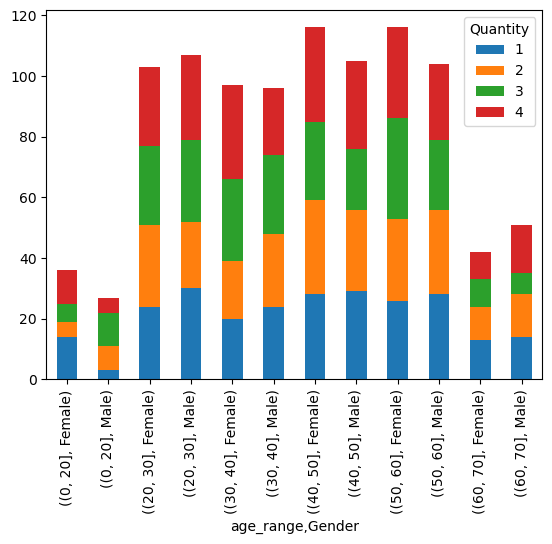

In [21]:
# Purchasing Behavior by Age and Gender (Stacked Bar Chart)
df_cleaned.groupby(['age_range','Gender','Quantity']).size().unstack().plot(kind='bar', stacked=True)

###### Product Prize Distribution within each Category

<Axes: xlabel='Product Category'>

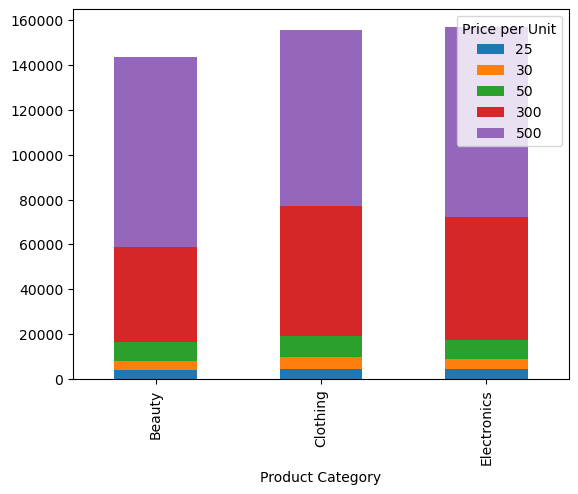

In [22]:
# Total Amount Spent for Each Category
df_cleaned.groupby(['Product Category','Price per Unit'])['Total Amount'].sum().unstack().plot(kind='bar', stacked=True)
# Based on this we notice that for each category, the greatest contribution comes from
# units priced at 500 and 300 each

In [23]:
# % of total revenue per category
#Extracting dataset values for Beauty, Clothing and Electronics
df_beauty = df_cleaned.loc[df_cleaned['Product Category']=='Beauty']
df_clothing = df_cleaned.loc[df_cleaned['Product Category']=='Clothing']
df_electronics = df_cleaned.loc[df_cleaned['Product Category']=='Electronics']


###### Product Category with the highest Appeal

<function matplotlib.pyplot.show(close=None, block=None)>

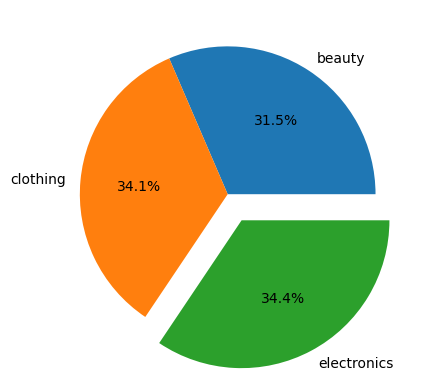

In [24]:
a = df_beauty['Total Amount'].sum()
b = df_clothing['Total Amount'].sum()
c = df_electronics['Total Amount'].sum()
revenue = [a,b,c]
labels = ['beauty','clothing','electronics']
myexplode = [0, 0 , 0.2]

plt.pie(revenue, labels = labels, autopct='%.1f%%', explode = myexplode)
plt.show

# We notice that electronics have the greatest contribution to revenue ~34.4%